# Entrenamiento de modelo <span style="color:blue">Cure</span>
### En esta sección se llevará a cabo el entrenamiento de los modelos de aprendizaje no supervisado

In [1]:
#importación de librerias
from sklearn import preprocessing
import pandas as pd
import numpy as np
import locale

In [2]:
#Carga de los datos previamente procesados
locale.setlocale(locale.LC_ALL,'')
#Carga de datos
datos_entrenamiento_completos = pd.read_csv("df_censo_aprendizaje_no_supervisado_v2.csv",
                              delimiter = ',', header=0, 
                              encoding='utf-8')
#eliminar la columna del indice
datos_entrenamiento_completos = datos_entrenamiento_completos.drop(datos_entrenamiento_completos.columns[0], axis=1)
tamanio_datos_totales = datos_entrenamiento_completos.shape[0]

In [3]:
#devido a la complejidad computacional del algoritmo es necesario realizar un muestreo
tamanio_muestra = 100000
datos_entrenamiento = datos_entrenamiento_completos.sample(n=tamanio_muestra, replace=False)
datos_entrenamiento.reset_index(inplace=True)
del datos_entrenamiento_completos

In [4]:
display(datos_entrenamiento)

,index,MUNICIPIO_persona,PCP5_persona,PCP6_persona,PCP7_persona,PCP9_persona,LUGNACGEO_persona,PCP12_persona,PCP13_persona,PCP14_persona,...,PCP32_1D_jefe_hogar,PCP33_jefe_hogar,PCP33_B_jefe_hogar,TRABAJAGEO_jefe_hogar,PCP34_jefe_hogar,VIVEHABGEO_jefe_hogar,NIVGRADO_jefe_hogar,ANEDUCA_jefe_hogar,MIGRA_VIDA_jefe_hogar,MIGRA_REC_jefe_hogar
0,878918,0.588182,0.400000,1.0,0.25,0.111111,0.567203,0.833333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.285714,0.588182,0.138889,0.000000,0.5,0.5
1,597519,0.413171,0.200000,1.0,0.25,0.111111,0.391910,0.833333,0.000000,0.000000,...,0.070707,0.222222,0.409091,0.395389,0.428571,0.413171,0.458333,0.142857,0.5,0.5
2,497718,0.322057,0.200000,0.5,1.00,0.111111,0.310570,0.166667,0.500000,0.222222,...,0.010101,0.111111,0.318182,0.310570,0.285714,0.322057,0.458333,0.142857,0.5,0.5
3,1168196,0.722147,0.933333,1.0,0.00,0.111111,0.696390,0.166667,0.772727,0.222222,...,0.030303,0.222222,0.727273,0.699870,0.428571,0.722147,0.458333,0.142857,1.0,0.5
4,1662254,0.677041,0.200000,1.0,0.00,0.111111,0.652893,0.833333,0.000000,0.000000,...,0.010101,0.111111,0.681818,0.652893,0.285714,0.677041,0.138889,0.000000,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,128028,0.048714,0.200000,1.0,0.50,0.111111,0.046977,0.833333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.428571,0.048714,0.597222,0.428571,0.5,0.5
99996,404923,0.230492,0.200000,1.0,0.00,0.111111,0.217921,0.833333,0.000000,0.000000,...,0.191919,0.111111,0.227273,0.222271,0.428571,0.230492,0.583333,0.380952,0.5,0.5
99997,260196,0.135769,0.200000,1.0,1.00,0.111111,0.130926,0.833333,0.000000,0.000000,...,0.131313,0.222222,0.045455,0.043932,0.428571,0.135769,0.638889,0.571429,0.5,0.5
99998,1586199,0.998196,0.200000,0.5,0.25,0.111111,0.962592,0.500000,0.000000,0.222222,...,0.010101,0.111111,1.000000,0.962592,0.428571,0.998196,0.430556,0.047619,0.5,0.5


# <span style="color:blue">Busqueda aleatoria de hiper-parametros</span>
## Proceso más costoso, la busqueda de los mejores valores para los hiper-parametros

In [5]:
#Instalacion de librerias para utilizar CURE
#pip3 install pyclustering

In [6]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

from sklearn import metrics
import random
import time

In [7]:
#metodo para crear un vector de etiquetas en base a los indices del cluster
#para presentar los resultads obtenidos por Cure
def obtener_etiquetas(datos_analisis,tamanio_lista):
    etiquetas = pd.DataFrame(np.zeros(shape=(tamanio_lista,1)))
    clust_num = 1
    for clust_ix in datos_analisis:
        etiquetas.loc[clust_ix] =clust_num
        clust_num +=1
    return etiquetas
#etiquetas_y = obtener_etiquetas(clusters,len(input_data))

In [10]:
#obtener valores de hiper-parametros a utilizar para busqueda
num_busquedas, ix = 10, 0
hiper_k =[]
while ix<num_busquedas:
    hip_t = int(random.uniform(2, 100))
    if hip_t not in hiper_k:
        hiper_k.append(hip_t)
        ix +=1
hiper_k.append(2)        

In [11]:
print(hiper_k)

[29, 16, 85, 17, 39, 76, 7, 15, 91, 32, 2]


In [12]:
#--Metodo creado para obtener las metricas de un modelo
# hiper_p_n_clusters = valor utilizado de k
# datos_entrenamiento = datos utilizados para el entrenamiento del modelo
# labels = labels resultantes del modelo
# tamanio_muestra = tamaño de la muestra a utilizar para calcular la metrica silhoutte
# imprimir_datos = indica si adicionalmente a devolver los parametros debe imprimirlos en pantalla
# start= tiempo de inicio del entrenamiento del modelo, utilizado para calcular el tiempo que tarde el modelo en entrenarse
# tamanio_data_original =tamaño del dataset original, se utiliza para calcular los puntos excluidos del analisis
def obtener_metricas(hiper_p_n_clusters, datos_entrenamiento, labels, tamanio_muestra, imprimir_datos, start, 
                     tamanio_data_original):    
    #Generacion de métricas
    #start = time.process_time()

    #Despliegue de metricas del modelo resultante
    # 0. Hiper parametros utilizados
    if imprimir_datos:
        print('Modelo ejecutado utilizando los hiper-parametros: k= %d' % (hiper_p_n_clusters))
        print("-----------------------------")

    # 1.Número de clusters generados:
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    if imprimir_datos:
        print('Número de Clusters generados por el modelo: %d' % n_clusters_)

    # 2.Número de puntos excluidos (considerados como ruido)
    n_noise_ = list(labels).count(-1)
    n_noise_ += tamanio_data_original-datos_entrenamiento.shape[0]
    if imprimir_datos:
        print('Puntos del modelo considerados como ruido: %d' % n_noise_)

    # 3.calinski_harabasz_score
    #   Criterio del radio de varianza
    #   Se define como la relación entre la dispersión dentro del grupo y la dispersión entre grupos
    #   Conforme los valores son más altos, indican mejores resultados
    #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score
    metrica_calinski = metrics.calinski_harabasz_score(datos_entrenamiento, labels)
    if imprimir_datos:
        print("calinski harabasz score: %0.3f" % metrica_calinski)

    # 4.davies_bouldin_score
    #   El puntaje se define como la medida de similitud promedio de cada cluster con su grupo más similar, 
    #   donde la similitud es la relación entre las distancias dentro del grupo y las distancias entre grupos. 
    #   Por lo tanto, los grupos que están más separados y menos dispersos resultarán en una mejor puntuación.
    #   Valores más bajos indican mejores resultados
    #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score
    metrica_davies_bou =metrics.davies_bouldin_score(datos_entrenamiento, labels)
    if imprimir_datos:
        print("davies bouldin score: %0.3f" % metrica_davies_bou)

    # 5.silhouette_score
    #   El coeficiente se calcula utilizando la distancia media intra-cluster y la media del cluster mas cercano.
    #   El valor que indica mejores resultados es 1 y peores resultados es -1
    #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
    metrica_silhouette = metrics.silhouette_score(datos_entrenamiento, labels, sample_size=tamanio_muestra)
    if imprimir_datos:
        print("Silhouette Coefficient: %0.3f" % metrica_silhouette)
        print("Tiempo para generación de métricas (segundos): "+str(time.time() - start))
    
    new_row = {'k':"k="+str(hiper_p_n_clusters),'clusters':n_clusters_, 'p_ruido':n_noise_, 
               'calinski_harabasz_score':metrica_calinski,
               'davies_bouldin_score':metrica_davies_bou, 'silhouette_score': metrica_silhouette,
               'tiempo_ejec':str(time.time() - start)}
    
    return new_row

In [13]:
#ejecutar modelos en busqueda aleatoria para encontrar la mejor combinación de hiper-parametros
#proceso costoso en tiempo y procesamiento
start =  time.time()
datos_label = pd.DataFrame()
matriz_hiper_p = pd.DataFrame(columns = ['k','clusters','p_ruido', 'calinski_harabasz_score', 'davies_bouldin_score',
                                         'silhouette_score', 'tiempo_ejec'])
for item_k in hiper_k:
    partial_start = time.time()
    
    print("Inicio de iteración: "+"k="+str(item_k))
    cluster_3 = cure(data = datos_entrenamiento.values.tolist(), number_cluster = item_k, ccore = True);    
    cluster_3.process();
    clusters = cluster_3.get_clusters();    
    labels_ = obtener_etiquetas(clusters,len(datos_entrenamiento))[0]
    datos_label["k="+str(item_k)] = labels_
    new_row = obtener_metricas(item_k, datos_entrenamiento, labels_, 50000, False, partial_start,tamanio_datos_totales)
    matriz_hiper_p = matriz_hiper_p.append(new_row, ignore_index=True)       
    print("--Duración (segundos): %d"%( time.time() - partial_start))
    del cluster_3             
    
print("Tiempo utilizado para busqueda de hiper-parametros (segundos): %d"%( time.time() - start))        

Inicio de iteración: k=29
--Duración (segundos): 15689
Inicio de iteración: k=16
--Duración (segundos): 14467
Inicio de iteración: k=85
--Duración (segundos): 14561
Inicio de iteración: k=17
--Duración (segundos): 14019
Inicio de iteración: k=39
--Duración (segundos): 14197
Inicio de iteración: k=76
--Duración (segundos): 14727
Inicio de iteración: k=7
--Duración (segundos): 14448
Inicio de iteración: k=15
--Duración (segundos): 14511
Inicio de iteración: k=91
--Duración (segundos): 14480
Inicio de iteración: k=32
--Duración (segundos): 14356
Inicio de iteración: k=2
--Duración (segundos): 14660
Tiempo utilizado para busqueda de hiper-parametros (segundos): 160125


In [14]:
display(matriz_hiper_p)

,k,clusters,p_ruido,calinski_harabasz_score,davies_bouldin_score,silhouette_score,tiempo_ejec
0,k=29,29,1581890,2.583149e+06,0.500856,0.497042,15689.873924970627
1,k=16,16,1581890,1.474622e+06,0.500133,0.496441,14467.00743317604
2,k=85,85,1581890,7.232314e+06,0.502522,0.481012,14561.277690410614
3,k=17,17,1581890,1.564308e+06,0.500229,0.502739,14019.249830007553
4,k=39,39,1581890,3.368336e+06,0.502099,0.492730,14197.814993619919
5,k=76,76,1581890,6.605235e+06,0.502907,0.489291,14727.59337735176
6,k=7,7,1581890,6.578354e+05,0.501929,0.526234,14448.21306681633
7,k=15,15,1581890,1.407618e+06,0.500674,0.504159,14511.641510009766
8,k=91,91,1581890,7.718765e+06,0.502215,0.484921,14480.976399898529
9,k=32,32,1581890,2.776673e+06,0.501263,0.493144,14356.380838632584


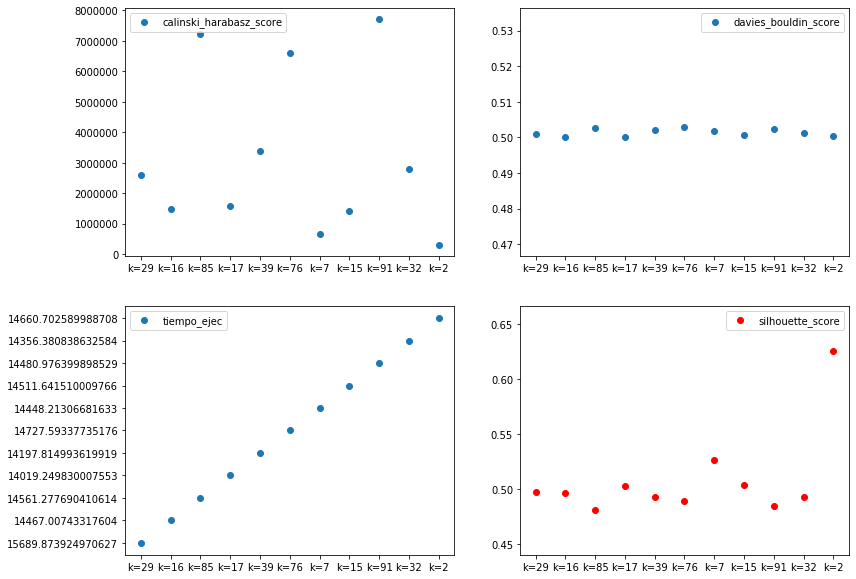

In [15]:
#Grafica del resultado de busqueda aleatoria de hiper-parametros
import matplotlib.pyplot as plt
#graficado:
figura, graficas = plt.subplots(2,2) #crear una matriz de 2 x 2 para plot
graficas[0,0].scatter(matriz_hiper_p["k"], matriz_hiper_p["calinski_harabasz_score"], label="calinski_harabasz_score")
graficas[0,1].scatter(matriz_hiper_p["k"], matriz_hiper_p["davies_bouldin_score"], label="davies_bouldin_score") 
graficas[1,1].scatter(matriz_hiper_p["k"], matriz_hiper_p["silhouette_score"], color="r", label="silhouette_score") 
graficas[1,0].scatter(matriz_hiper_p["k"], matriz_hiper_p["tiempo_ejec"], label="tiempo_ejec") 

plt.subplots_adjust(bottom=-0.1, right=1.8, top=1.8)

graficas[0,0].legend()
graficas[0,1].legend()
graficas[1,1].legend()
graficas[1,0].legend()

plt.show()

# <span style="color:blue">Guardar resultados</span>
## Se almacenan los resultados obtenidos con los modelos entrenados

In [16]:
#Agregar columnas de clase objetivo
for column in datos_label.columns:
    datos_entrenamiento[column] = datos_label[column]

In [17]:
# Crear columna calculada con información del municipio para esto se realiza el inverso de MaxAbsScaler
# por lo cual basta con multiplicarla por el valor maximo de municipio
datos_entrenamiento['MUNICIPIO_calc'] = round(datos_entrenamiento.MUNICIPIO_persona *2217)

In [18]:
#mostrar datos finales
display(datos_entrenamiento)
print()
display(matriz_hiper_p)

,index,MUNICIPIO_persona,PCP5_persona,PCP6_persona,PCP7_persona,PCP9_persona,LUGNACGEO_persona,PCP12_persona,PCP13_persona,PCP14_persona,...,k=85,k=17,k=39,k=76,k=7,k=15,k=91,k=32,k=2,MUNICIPIO_calc
0,878918,0.588182,0.400000,1.0,0.25,0.111111,0.567203,0.833333,0.000000,0.000000,...,68.0,1.0,14.0,45.0,1.0,12.0,81.0,31.0,1.0,1304.0
1,597519,0.413171,0.200000,1.0,0.25,0.111111,0.391910,0.833333,0.000000,0.000000,...,34.0,9.0,39.0,10.0,4.0,13.0,52.0,27.0,2.0,916.0
2,497718,0.322057,0.200000,0.5,1.00,0.111111,0.310570,0.166667,0.500000,0.222222,...,57.0,9.0,34.0,34.0,4.0,13.0,71.0,28.0,2.0,714.0
3,1168196,0.722147,0.933333,1.0,0.00,0.111111,0.696390,0.166667,0.772727,0.222222,...,40.0,14.0,16.0,15.0,5.0,9.0,57.0,30.0,1.0,1601.0
4,1662254,0.677041,0.200000,1.0,0.00,0.111111,0.652893,0.833333,0.000000,0.000000,...,51.0,16.0,13.0,27.0,6.0,11.0,66.0,22.0,1.0,1501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,128028,0.048714,0.200000,1.0,0.50,0.111111,0.046977,0.833333,0.000000,0.000000,...,25.0,11.0,38.0,3.0,7.0,5.0,44.0,24.0,2.0,108.0
99996,404923,0.230492,0.200000,1.0,0.00,0.111111,0.217921,0.833333,0.000000,0.000000,...,46.0,4.0,6.0,22.0,4.0,15.0,62.0,13.0,2.0,511.0
99997,260196,0.135769,0.200000,1.0,1.00,0.111111,0.130926,0.833333,0.000000,0.000000,...,7.0,17.0,27.0,69.0,7.0,14.0,20.0,10.0,2.0,301.0
99998,1586199,0.998196,0.200000,0.5,0.25,0.111111,0.962592,0.500000,0.000000,0.222222,...,3.0,16.0,8.0,71.0,6.0,11.0,15.0,21.0,1.0,2213.0


,k,clusters,p_ruido,calinski_harabasz_score,davies_bouldin_score,silhouette_score,tiempo_ejec
0,k=29,29,1581890,2.583149e+06,0.500856,0.497042,15689.873924970627
1,k=16,16,1581890,1.474622e+06,0.500133,0.496441,14467.00743317604
2,k=85,85,1581890,7.232314e+06,0.502522,0.481012,14561.277690410614
3,k=17,17,1581890,1.564308e+06,0.500229,0.502739,14019.249830007553
4,k=39,39,1581890,3.368336e+06,0.502099,0.492730,14197.814993619919
5,k=76,76,1581890,6.605235e+06,0.502907,0.489291,14727.59337735176
6,k=7,7,1581890,6.578354e+05,0.501929,0.526234,14448.21306681633
7,k=15,15,1581890,1.407618e+06,0.500674,0.504159,14511.641510009766
8,k=91,91,1581890,7.718765e+06,0.502215,0.484921,14480.976399898529
9,k=32,32,1581890,2.776673e+06,0.501263,0.493144,14356.380838632584


In [19]:
#Guardar en disco los resultados
datos_entrenamiento.to_csv('df_Cure_datos_y.csv', encoding='utf-8')
matriz_hiper_p.to_csv('df_Cure_metricas.csv', encoding='utf-8')